In [1]:
import re
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import seaborn as sns


# --- 0) Parametreler / yollar ---
RARE_THRESHOLD = 10  # 2300 hasta için nadirlik eşiği
OUTDIR = Path.home() / "Desktop" / "Pusula_Meryem_Altundal" / "prep_outputs"
os.makedirs(OUTDIR, exist_ok=True)
OUTDIREDA = Path.home() / "Desktop" / "Pusula_Meryem_Altundal" / "eda_raw_outputs"
os.makedirs(OUTDIR, exist_ok=True)
xlsx_path = Path.home() / "Desktop" / "Pusula_Meryem_Altundal" / "data" / "Talent_Academy_Case_DT_2025.xlsx"
TARGET_COL = "TedaviSuresi"
# (İsterseniz proje içindeki göreli yolu da deneyebilirsiniz:)
# xlsx_path = Path("Pusula_Meryem_Altundal") / "data" / "Talent_Academy_Case_DT_2025.xlsx"


/tmp/ipykernel_12874/2051379104.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/beytulkebap/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:

# 2) Dosya var mı kontrol et
if not xlsx_path.exists():
    raise FileNotFoundError(f"Dosya bulunamadı: {xlsx_path}")
# 3) Sayfaları listele ve ilk sayfayı DataFrame'e çevir
with pd.ExcelFile(xlsx_path) as xls: 
    print("Bulunan sayfalar:", xls.sheet_names)
    sheet_to_use = xls.sheet_names[0]         # İstersen adıyla da seçebilirsin: 'Sheet1' vb.
    df = pd.read_excel(xls, sheet_name=sheet_to_use)

print(f"Yüklenen sayfa: {sheet_to_use}  |  Şekil: {df.shape}")
print(df.head(3))

Bulunan sayfalar: ['Sheet1']
Yüklenen sayfa: Sheet1  |  Şekil: (2235, 13)
   HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0   145134   60    Kadın    0 Rh+  Türkiye   
1   145135   28    Erkek    0 Rh+  Türkiye   
2   145135   28    Erkek    0 Rh+  Türkiye   

                                      KronikHastalik  \
0  Becker Musküler Distrofisi, Hiportiroidizm, Ka...   
1  Duchenne Musküler Distrofisi, Myastenia gravis...   
2  Duchenne Musküler Distrofisi, Myastenia gravis...   

                                            Bolum Alerji  \
0  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    TOZ   
1  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
2  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   

                                             Tanilar  \
0         Ayak bileği ve ayağın yüzeysel yaralanması   
1  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
2  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   

                         TedaviAdi TedaviSuresi Uy

1. EDA 


--- DTypes ---
HastaNo             int64
Yas                 int64
Cinsiyet           object
KanGrubu           object
Uyruk              object
KronikHastalik     object
Bolum              object
Alerji             object
Tanilar            object
TedaviAdi          object
TedaviSuresi       object
UygulamaYerleri    object
UygulamaSuresi     object
dtype: object

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi  

,column,unique_count,value,count
0,HastaNo,404,145267,27
1,HastaNo,404,145307,26
2,HastaNo,404,145343,20
3,HastaNo,404,145453,18
4,HastaNo,404,145201,17
5,HastaNo,404,145231,15
6,HastaNo,404,145391,14
7,HastaNo,404,145317,14
8,HastaNo,404,145481,13
9,HastaNo,404,145257,12


-> /home/beytulkebap/Desktop/Pusula_Meryem_Altundal/eda_raw_outputs/unique_value_summary_top20.csv kaydedildi.

Sayısal kolonlar: ['HastaNo', 'Yas']
Sayısal olmayan kolonlar: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi', 'UygulamaYerleri', 'UygulamaSuresi']


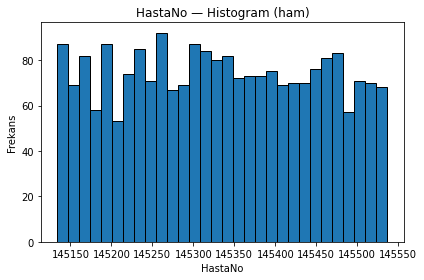

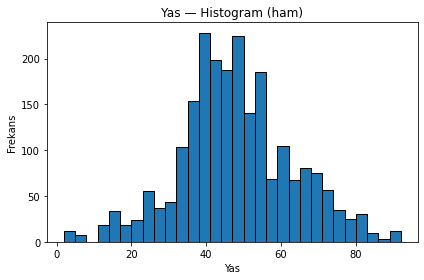

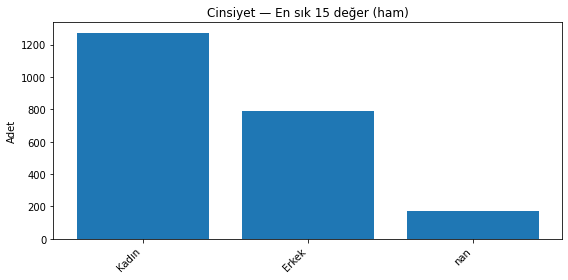

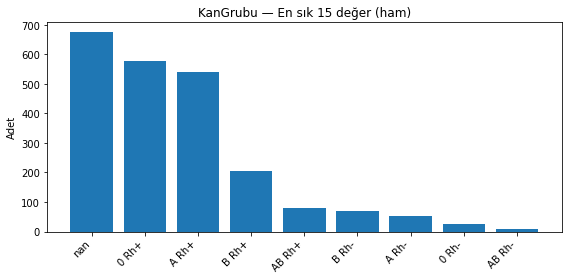

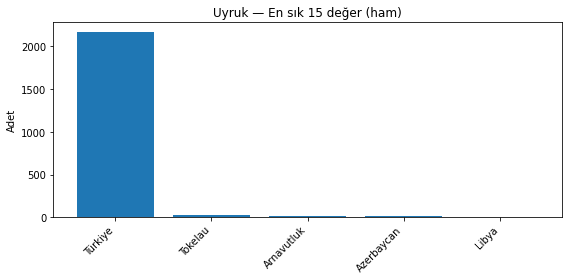

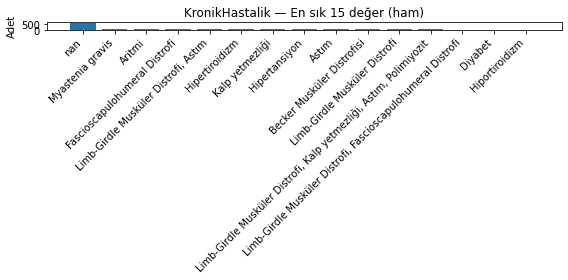

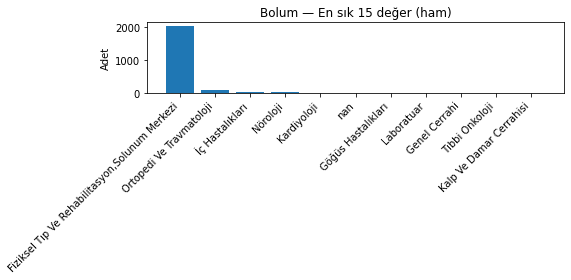

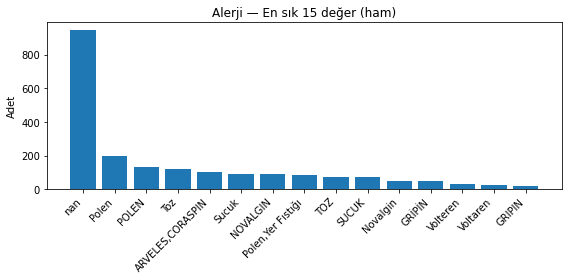

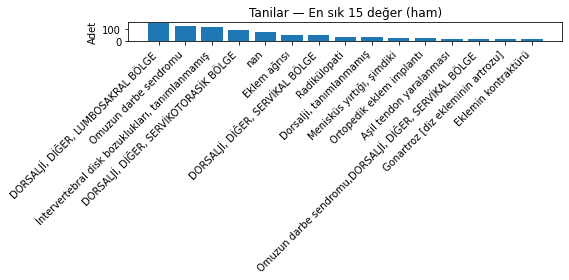

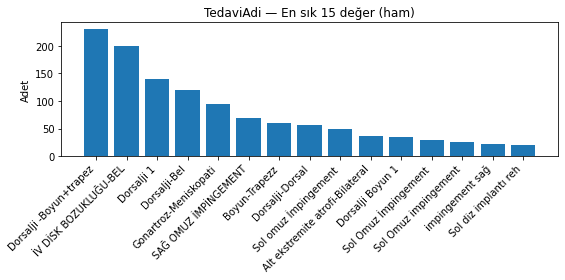

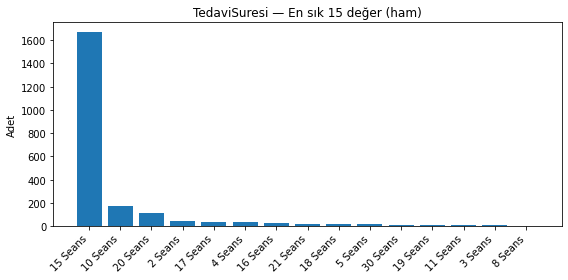

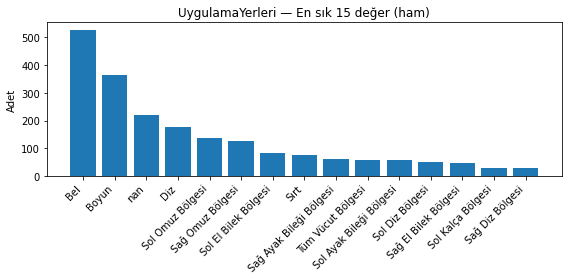

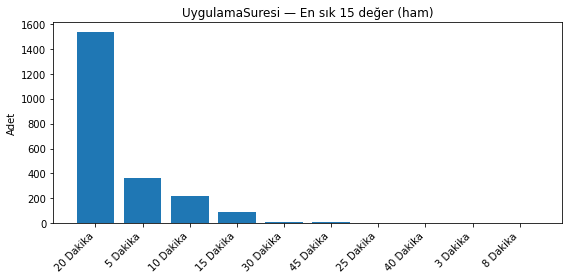

,count,mean,std,min,25%,50%,75%,max
HastaNo,2235.0,145333.100224,115.214248,145134.0,145235.0,145331.0,145432.0,145537.0
Yas,2235.0,47.327069,15.208634,2.0,38.0,46.0,56.0,92.0


-> /home/beytulkebap/Desktop/Pusula_Meryem_Altundal/eda_raw_outputs/describe_numeric.csv kaydedildi.


,missing_count,missing_pct
Alerji,944,42.24
KanGrubu,675,30.20
KronikHastalik,611,27.34
UygulamaYerleri,221,9.89
Cinsiyet,169,7.56
Tanilar,75,3.36
Bolum,11,0.49
HastaNo,0,0.00
Yas,0,0.00
Uyruk,0,0.00


-> /home/beytulkebap/Desktop/Pusula_Meryem_Altundal/eda_raw_outputs/missingness_raw.csv kaydedildi.


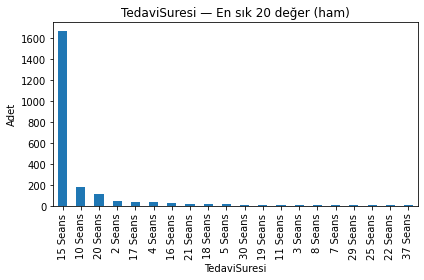


 Ham veri EDA görselleri ve özetleri üretildi. (Preprocessing YAPMADIK.)
Tüm çıktı klasörü: /home/beytulkebap/Desktop/Pusula_Meryem_Altundal/eda_raw_outputs/


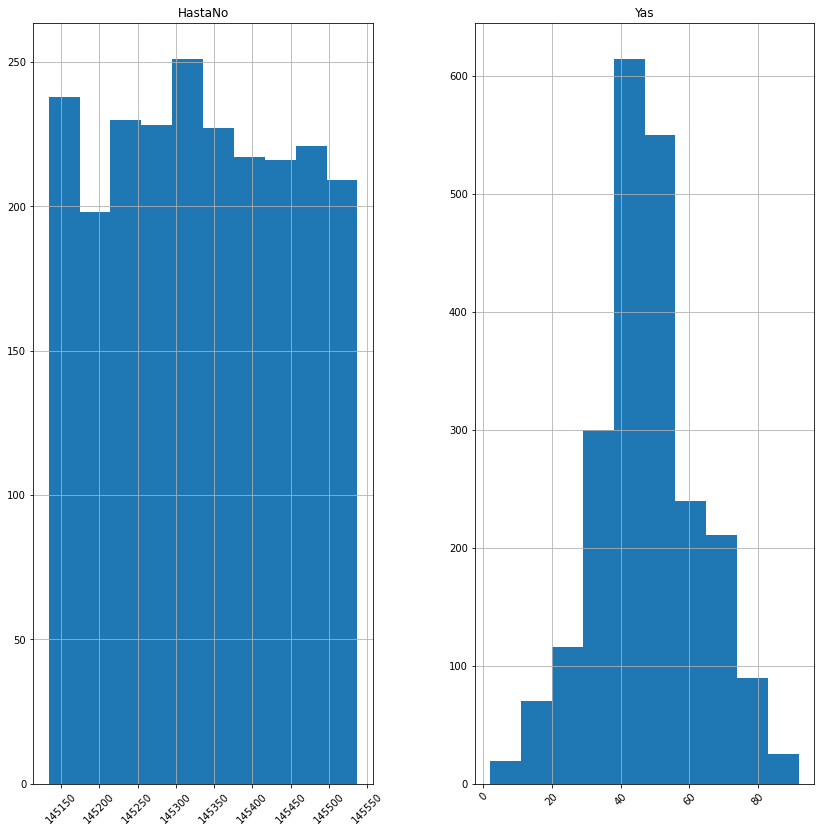

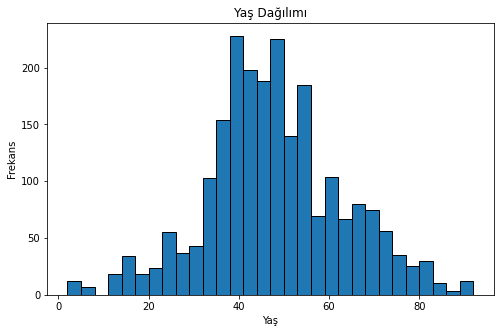

count    2235.000000
mean       47.327069
std        15.208634
min         2.000000
25%        38.000000
50%        46.000000
75%        56.000000
max        92.000000
Name: Yas, dtype: float64
Kaç farklı yaş değeri var: 75


In [3]:

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)


# Genel bilgi
print("\n--- DTypes ---")
print(df.dtypes)
print("\n--- Info ---")
print(df.info())

# Tüm kolonlar için unique değer frekans tablosu
def unique_value_summary(df, top_n=20):
    """
    Preprocessing yapmadan, her kolonun değer frekanslarını tabloya döker.
    - unique_count: kolondaki toplam farklı değer sayısı
    - value, count: en sık görülen ilk N değer ve adetleri
    """
    rows = []
    for col in df.columns:
        vc = df[col].value_counts(dropna=False)
        total_unique = vc.shape[0]
        for val, cnt in vc.head(top_n).items():
            rows.append({
                "column": col,
                "unique_count": total_unique,
                "value": val,
                "count": cnt
            })
    return pd.DataFrame(rows)

summary = unique_value_summary(df, top_n=20)
display(summary.head(60))
summary.to_csv(os.path.join(OUTDIREDA, "unique_value_summary_top20.csv"), index=False)
print(f"-> {OUTDIREDA}/unique_value_summary_top20.csv kaydedildi.")

# 4) Sayısal ve sayısal-olmayan ayrımı
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
non_num_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nSayısal kolonlar:", num_cols)
print("Sayısal olmayan kolonlar:", non_num_cols)

# 5) Sayısal kolonların dağılım grafikleri 

if len(num_cols) > 0:
    for c in num_cols:
        plt.figure(figsize=(6,4))
        try:
            df[c].plot(kind="hist", bins=30, edgecolor="black")
            plt.title(f"{c} — Histogram (ham)")
            plt.xlabel(c); plt.ylabel("Frekans")
            plt.tight_layout()
            plt.savefig(os.path.join(OUTDIREDA, f"hist_{c}.png"), dpi=150, bbox_inches="tight")
            plt.show()
        except Exception as e:
            print(f"[Uyarı] {c} histogram çizilemedi:", e)
else:
    print("Sayısal kolon bulunamadı (ham).")

# 6) Kategorik/sayısal-olmayan kolonlar için en sık değer bar grafikleri
# Çok fazla kategori olabilir; grafiği en sık ilk N değere kısıtlıyoruz.
TOPN = 15
for c in non_num_cols:
    vc = df[c].astype(str).value_counts(dropna=False).head(TOPN)
    plt.figure(figsize=(8,4))
    plt.bar(vc.index, vc.values)
    plt.title(f"{c} — En sık {TOPN} değer (ham)")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Adet")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTDIREDA, f"bar_{c}_top{TOPN}.png"), dpi=150, bbox_inches="tight")
    plt.show()

# 7) Hızlı özet tablolar 
# a) Sayısal özetler
if len(num_cols) > 0:
    desc_num = df[num_cols].describe().T
    display(desc_num)
    desc_num.to_csv(os.path.join(OUTDIREDA, "describe_numeric.csv"))
    print(f"-> {OUTDIREDA}/describe_numeric.csv kaydedildi.")

# b) Eksik değer özetleri
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean()*100).round(2).sort_values(ascending=False)
missing_table = pd.DataFrame({"missing_count": missing_counts, "missing_pct": missing_pct})
display(missing_table)
missing_table.to_csv(os.path.join(OUTDIREDA, "missingness_raw.csv"))
print(f"-> {OUTDIREDA}/missingness_raw.csv kaydedildi.")

# 8) Hedef değişkeni ham haliyle kontrol
if "TedaviSuresi" in df.columns:
    plt.figure(figsize=(6,4))
    df["TedaviSuresi"].astype(str).value_counts().head(20).plot(kind="bar")
    plt.title("TedaviSuresi — En sık 20 değer (ham)")
    plt.ylabel("Adet"); plt.tight_layout()
    plt.savefig(os.path.join(OUTDIREDA, "bar_TedaviSuresi_raw_top20.png"), dpi=150, bbox_inches="tight")
    plt.show()

print("\n Ham veri EDA görselleri ve özetleri üretildi. (Preprocessing YAPMADIK.)")
print(f"Tüm çıktı klasörü: {OUTDIREDA}/")

df.hist(figsize=(14,14), xrot=45)
plt.show()

plt.figure(figsize=(8,5))
df["Yas"].dropna().plot(kind="hist", bins=30, edgecolor="black")
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()

print(df["Yas"].describe())
print("Kaç farklı yaş değeri var:", df["Yas"].nunique())


**## 1. EDA ve Ön İşlemlerden Çıkan Kararlar**

***# Hasta No Kolonu***

**Durum:** Bu kolon yalnızca kimlik bilgisi taşımaktadır, tedavi süresi veya diğer klinik değişkenlerle ilişkili değildir.

**Karar:** Analize katkısı olmadığından tamamen düşürülmüştür.


***# Uyruk Kolonu***

**Durum:** Kayıtların çok büyük kısmı Türkiye uyruklu hastalardan oluşmaktadır. Yurt dışı hastalar yalnızca birkaç kayıttan ibarettir.

**Değerlendirme:** Azınlık gruptaki hastalar farklı bölümlere yönelmiş olsa da, sayı yetersiz olduğundan istatistiksel olarak genelleştirilemez.

**Karar:** Uyruk kolonunun modelde yanıltıcı etki yaratmaması için veri setinden çıkarılmasına karar verilmiştir.


***# String / Object Veriler***

**Durum:** Alerji, Tanı ve Kronik Hastalık gibi kolonlar liste formatında tutulmuş, büyük/küçük harf, yazım farkı ve noktalama hataları içerdiği görülmüştür.

**Karar:** Tüm string veriler küçük harfe dönüştürülecek,
Noktalama ve boşluk farklılıkları normalize edilecek,
Aynı anlamı taşıyan ifadeler (örn. “Polen”, “POLEN”) tek tipe indirgenecektir.


**# Yaş Kolonu**

**Durum:** Genel dağılım 0–90 yaş arasında yoğunlaşmıştır, ancak çok az sayıda tekil uç değer gözlenmiştir.

**Karar:** Yaş dağılımı histogramla incelenmiş,
Yalnızca tek başına duran ve nadir görülen uç değerler veri setinden çıkarılmıştır.

**Gerekçe:** Bu değerlerin model öğrenmesini bozabileceği, fakat sayıca çok az oldukları için çıkarılmalarının dengeli olacağı düşünülmüştür.

***# Tedavi ve Uygulama Süreleri***

**Durum:** Veriler “15 Seans”, “20 Dakika” formatındadır.

**Karar:** Tedavi süresi → yalnızca seans sayısı (tam sayı),
Uygulama süresi → yalnızca dakika (tam sayı) olacak şekilde dönüştürülmüştür.
Yeni bir değişken olarak Toplam Tedavi Süresi (seans × dakika) eklenmiştir.

***# Nadir Kategoriler***

**Durum:** Tanı, Kronik Hastalık, Alerji ve Uygulama Yerleri kolonlarında çok sayıda kategori bulunmakta, bazıları yalnızca birkaç hastada gözlenmektedir.

**Karar:** 2300 hasta için eşik = 10 belirlenmiştir.
10’dan az kez geçen kategoriler other etiketi altında toplanacaktır.

**Gerekçe:** Bu değerler modele gürültü katmakta,
Sparse matris oluşumunu artırmakta,
Genelleştirilebilirliği azaltmaktadır.
other grubu sayesinde model bu bilgiyi kaybetmeden daha stabil hale gelecektir.


***# Çoklu Değerli Kolonlar***

**Durum:** “Alerji”, “Tanılar” ve “KronikHastalık” kolonları çoklu etiketler içermektedir.

**Karar:** Bu kolonlar multi-label binary encoding yöntemiyle dönüştürülecektir.

Her sık görülen kategori için yeni bir sütun açılacak (var=1, yok=0).

Nadir olanlar other sütununda toplanacaktır.

**Örnek:** “Astım, Diyabet” kaydı → has_astim=1, has_diyabet=1, other=0.

In [4]:
# Ayarlar

DEPARTMANLAR = [
    "İç Hastalıkları",
    "Ortopedi Ve Travmatoloji",
    "Genel Cerrahi",
]
# Tedavi süresi için makul aralık (isteğe göre değiştir)
TEDAVI_ARALIK = (1, 200)

# Yardımcılar

def _norm_tr(s: str) -> str:
    if s is None: return ""
    s = str(s).strip().lower()
    for a,b in {"ı":"i","İ":"i","ş":"s","Ş":"s","ğ":"g","Ğ":"g","ç":"c","Ç":"c","ö":"o","Ö":"o","ü":"u","Ü":"u"}.items():
        s = s.replace(a,b)
    return re.sub(r"\s+", "", s)

def rename_with_aliases(df: pd.DataFrame) -> pd.DataFrame:
    """Kolon adlarını sabitle: Bolum, Tanilar, TedaviSuresi"""
    alias_map = {
        "Bolum": ["Bolum", "Bölüm", "Bolüm", "Klinik", "KlinikAdi", "Servis", "Birim"],
        "Tanilar": ["Tanilar", "Tani", "Tanı", "Tanılar", "Teshis", "Teşhis"],
        "TedaviSuresi": ["TedaviSuresi", "TedaviSuresi(SeansSayısı)", "Tedavi Süresi", "tedavi süresi", "Seans", "SeansSayisi"],
    }
    canon = {_norm_tr(c): c for c in df.columns}
    for target, aliases in alias_map.items():
        for a in aliases:
            key = _norm_tr(a)
            if key in canon and canon[key] != target and target not in df.columns:
                df = df.rename(columns={canon[key]: target})
                break
    # Son kontrol: yoksa hata ver
    required = ["Bolum", "Tanilar", "TedaviSuresi"]
    missing = [c for c in required if c not in df.columns]
    if missing:
        raise KeyError(f"Eksik zorunlu kolon(lar): {missing}. Lütfen kolon adlarını kontrol et.")
    return df

def parse_tedavi_suresi(df: pd.DataFrame, col="TedaviSuresi", aralik=(1,200)) -> pd.DataFrame:
    """'15 seans' → 15; aralık dışını NaN yap; Int64'a çevir."""
    s = df[col].astype(str)
    num = (s.str.extract(r'(\d+(?:[.,]\d+)?)', expand=False)
            .str.replace(",", ".", regex=False)
            .astype(float))
    if aralik:
        mn, mx = aralik
        num = num.where((num >= mn) & (num <= mx))
    df[col] = num.round().astype("Int64")
    return df

def split_labels(val):
    """Tanilar içindeki çoklu etiketleri ayır: ; , / + |"""
    if isinstance(val, str):
        parts = re.split(r"[;,/+\|]", val)
        parts = [p.strip() for p in parts if p and p.strip()]
        return parts
    return []

def explode_tanilar(df: pd.DataFrame, tanicol="Tanilar") -> pd.DataFrame:
    """Tanilar'ı listeye çevirip explode eder; boşları düşer."""
    tmp = df[[tanicol, "TedaviSuresi", "Bolum"]].copy()
    tmp[tanicol] = tmp[tanicol].apply(split_labels)
    tmp = tmp.explode(tanicol)
    # boşları at
    tmp[tanicol] = tmp[tanicol].fillna("").astype(str).str.strip()
    tmp = tmp[tmp[tanicol] != ""]
    return tmp

def analiz_bolum(df_exploded: pd.DataFrame, bolum_adi: str, tanicol="Tanilar"):
    """Bir bölüm için top-10 tanı (frekans) ve median TedaviSuresi top-10."""
    sub = df_exploded[df_exploded["Bolum"] == bolum_adi]
    # 1) En sık 10 tanı
    top_freq = sub[tanicol].value_counts().head(10)
    # 2) Median TedaviSuresi'ye göre en uzun 10 tanı
    med_tbl = (sub.dropna(subset=["TedaviSuresi"])
                  .groupby(tanicol)["TedaviSuresi"]
                  .median()
                  .sort_values(ascending=False)
                  .head(10))
    return top_freq, med_tbl

# ANA AKIŞ 

# 1) Kolon sabitle
df = rename_with_aliases(df)

# 2) TedaviSuresi'ni sayıya çevir
df = parse_tedavi_suresi(df, "TedaviSuresi", TEDAVI_ARALIK)

# 3) Tanilar'ı explode et
dx = explode_tanilar(df, "Tanilar")

# 4) İstenen bölümler için hesapla ve yazdır
for bolum in DEPARTMANLAR:
    freq, med = analiz_bolum(dx, bolum, "Tanilar")
    print(f"\n=== {bolum} — En Sık 10 Tanı ===")
    print(freq)

    print(f"\n=== {bolum} — Median TedaviSuresi'ne Göre En Uzun 10 Tanı ===")
    print(med)



=== İç Hastalıkları — En Sık 10 Tanı ===
Tanilar
tanımlanmamış                       13
Parkinson hastalığı                  7
Diyabetes mellitüs                   7
peritoneal apse ile                  7
Akut apandisit                       7
Esansiyel (primer) hipertansiyon     7
Deliryum                             7
Mitral kapak yetmezliği              7
Kronik iskemik kalp hastalığı        7
demans üzerine eklenen               4
Name: count, dtype: int64

=== İç Hastalıkları — Median TedaviSuresi'ne Göre En Uzun 10 Tanı ===
Tanilar
Akut apandisit                              20.0
Konjestif kalp yetmezliği                   20.0
diğer tanımlanmış                           20.0
demans üzerine eklenmeyen                   20.0
demans üzerine eklenen                      20.0
tanımlanmamış komplikasyonlarla birlikte    20.0
Parkinson hastalığı                         20.0
Mitral kapak yetmezliği                     20.0
tanımlanmamış                               20.0
Kronik böbrek 

Tedavi süresinin yorumlanması bölüm bağlamına göre değişmektedir. Rehabilitasyon bölümlerinde gerçek tedavi süresini, diğer kliniklerde ise muayene ve kontrol sıklığını yansıtır. Bu nedenle FTR Ortopedi gibi bölümlere başvuran kayıtların tedavisüresi değişkeni gerçekten tedavi sürecini ifade ederken, data sette daha az bulunan diğer bölümleri "other" olarak gruplayıp ilk dataseti oluşturmak hedeflendi buna ek olarak daha anlamlı bir modelleme için ftr ve ortopedi ile oluşturulmuş bir data subseti oluşturulması uygun görüldü.

1.Data-Preprocessing

In [5]:


# 1) Kolon düşür
for col in ["Uyruk", "HastaNo"]:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# 2) Metinden sayısal değer çıkarma yardımcıları
def extract_first_int(s):
    if pd.isna(s):
        return np.nan
    m = re.search(r"(\d+)", str(s))
    return float(m.group(1)) if m else np.nan

# 3) TedaviSuresi ve UygulamaSuresi'ni sayıya çevir
if "TedaviSuresi" in df.columns:
    df["TedaviSuresi_num"] = df["TedaviSuresi"].apply(extract_first_int)

if "UygulamaSuresi" in df.columns:
    df["UygulamaSuresi_num"] = df["UygulamaSuresi"].apply(extract_first_int)

# 4) Toplam uygulama süresi (dakika) = seans sayısı * seans başı süre
if {"TedaviSuresi_num","UygulamaSuresi_num"}.issubset(df.columns):
    df["ToplamUygulamaSuresi_dk"] = df["TedaviSuresi_num"] * df["UygulamaSuresi_num"]

# 5) Yaş'ı güvenli numeric'e çevir
if "Yas" in df.columns:
    df["Yas"] = pd.to_numeric(df["Yas"], errors="coerce")

# 6) NaN standardizasyonu: tüm boş/bozuklar NaN
df = df.replace({ "": np.nan, "NA": np.nan, "NaN": np.nan, "nan": np.nan })

# 7) Çoklu değer kolonlarını hafifçe normalize et (EDA token analizine hazırlık)
multi_cols = ["Uyruk","KanGrubu","Cinsiyet","KronikHastalik","Alerji","Tanilar","UygulamaYerleri"]
for mc in multi_cols:
    if mc in df.columns:
        df[mc] = (
            df[mc]
            .fillna("")
            .astype(str)
            .str.replace(r"\s+", " ", regex=True)  
            .str.strip()
        )


# 9) Kısa özet
print("Hazırlık tamam ✅")
for c in ["Yas","TedaviSuresi","TedaviSuresi_num","UygulamaSuresi","UygulamaSuresi_num","ToplamUygulamaSuresi_dk","Yas_outlier_flag"]:
    if c in df.columns:
        print(c, "->", df[c].head(15).tolist())


Hazırlık tamam ✅
Yas -> [60, 28, 28, 28, 28, 28, 60, 60, 60, 65, 65, 65, 65, 65, 65]
TedaviSuresi -> [5, 15, 15, 15, 15, 15, 10, 10, 10, 15, 15, 15, 15, 15, 15]
TedaviSuresi_num -> [5.0, 15.0, 15.0, 15.0, 15.0, 15.0, 10.0, 10.0, 10.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
UygulamaSuresi -> ['20 Dakika', '20 Dakika', '20 Dakika', '5 Dakika', '20 Dakika', '20 Dakika', '30 Dakika', '20 Dakika', '20 Dakika', '15 Dakika', '20 Dakika', '20 Dakika', '5 Dakika', '15 Dakika', '20 Dakika']
UygulamaSuresi_num -> [20.0, 20.0, 20.0, 5.0, 20.0, 20.0, 30.0, 20.0, 20.0, 15.0, 20.0, 20.0, 5.0, 15.0, 20.0]
ToplamUygulamaSuresi_dk -> [100.0, 300.0, 300.0, 75.0, 300.0, 300.0, 300.0, 200.0, 200.0, 225.0, 300.0, 300.0, 75.0, 225.0, 300.0]


2.Data-Preprocessing

In [6]:

# --- 1) Yardımcılar ---
def normalize_text(s: str) -> str:
    """Küçük harf, trim; unicode sadeleştirme; iç boşlukları tekilleme."""
    if pd.isna(s):
        return ""
    s = str(s).strip().lower()
    # unicode normalize (ör: İ/ı, ş/Ş varyantları)
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.category(ch).startswith("M"))
    s = re.sub(r"\s+", " ", s)
    return s

def extract_first_int(s):
    """'15 Seans' -> 15, '20 Dakika' -> 20, None/boş -> NaN"""
    if pd.isna(s):
        return np.nan
    m = re.search(r"(\d+)", str(s))
    return float(m.group(1)) if m else np.nan

def tokenize(series: pd.Series, sep=","):
    """Çoklu-değer alanları token listesine çevir (normalize edilmiş)."""
    tokens_per_row = []
    for val in series.fillna("").astype(str):
        toks = [normalize_text(x) for x in val.split(sep) if normalize_text(x)!=""]
        tokens_per_row.append(toks)
    return tokens_per_row

def build_vocab_from_tokens(tokens_per_row, min_count=RARE_THRESHOLD):
    """Tüm satırlardaki token frekanslarını say; eşiği geçenleri vocab yap."""
    counts = {}
    for toks in tokens_per_row:
        for t in toks:
            counts[t] = counts.get(t, 0) + 1
    vocab = sorted([t for t,c in counts.items() if c >= min_count], key=lambda x: -counts[x])
    return vocab, counts

def multilabel_binarize(tokens_per_row, vocab, prefix):
    """Vocab’deki her token için 0/1 sütun, ayrıca other bayrağı ekle."""
    out = pd.DataFrame(index=range(len(tokens_per_row)))
    for tok in vocab:
        out[f"{prefix}_{tok}"] = [1 if tok in toks else 0 for toks in tokens_per_row]
    # other: vocab dışında token var mı?
    out[f"{prefix}_other"] = [1 if any(t not in set(vocab) for t in toks) and len(toks)>0 else 0
                              for toks in tokens_per_row]
    # sayac: toplam token sayısı (opsiyonel, faydalı sinyal olur)
    out[f"{prefix}_count"] = [len(toks) for toks in tokens_per_row]
    return out


def one_hot_top(df, col, min_count=20, prefix=None, to_lower=True):
    """
    Tek-etiket kategorik için:
      - eksik -> 'unknown'
      - frekansı min_count altı -> 'other'
      - get_dummies ile OHE
    Dönüş: (ohe_df[int8], mapped_series[str])
    """
    s = df[col].astype("string")
    if to_lower:
        s = s.str.lower()
    s = s.str.strip()
    s = s.fillna("unknown")

    vc = s.value_counts(dropna=False)
    keep = set(vc[vc >= min_count].index)  # eşik altı 'other' olur

    mapped = s.where(s.isin(keep), other="other")
    pre = prefix or col
    ohe = pd.get_dummies(mapped, prefix=pre, dtype=np.int8)

    # 'unknown' ve 'other' sütunları yoksa da ekle (tutarlılık)
    must_have = {f"{pre}_unknown", f"{pre}_other"}
    for k in must_have:
        if k not in ohe.columns:
            ohe[k] = 0

    return ohe.astype(np.int8), mapped


def clean_single_categorical(df, col, min_count=RARE_THRESHOLD):
    """
    Returns:
        mapped  : pd.Series (clean string; {'unknown','other', veya sık görülen sınıf})
        kept    : set (korunan sınıflar)
        counts  : pd.Series (ham sınıf sayımları)
    """
    s = df[col].astype(str)
    s_norm = s.apply(lambda x: np.nan if x.strip().lower() in ["", "nan", "none"] else x.strip())

    counts = s_norm.value_counts(dropna=True)
    kept = set(counts[counts >= min_count].index)

    def map_cat(x):
        if pd.isna(x): 
            return "unknown"
        return x if x in kept else "other"

    mapped = s_norm.map(map_cat)
    return mapped, kept, counts


In [7]:
# --- 2) Zorunlu dönüşümler (varsa tekraren güvenceye al) ---
# (Sen daha önce yaptın; burada idempotent çalışır.)
for col in ["Uyruk", "HastaNo"]:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

if "TedaviSuresi" in df.columns and "TedaviSuresi_num" not in df.columns:
    df["TedaviSuresi"] = df["TedaviSuresi"].apply(extract_first_int)

if "UygulamaSuresi" in df.columns and "UygulamaSuresi_num" not in df.columns:
    df["UygulamaSuresi"] = df["UygulamaSuresi"].apply(extract_first_int)

if {"TedaviSuresi_num","UygulamaSuresi_num"}.issubset(df.columns) and "ToplamUygulamaSuresi_dk" not in df.columns:
    df["ToplamUygulamaSuresi_dk"] = df["TedaviSuresi"] * df["UygulamaSuresi"]

if "Yas" in df.columns:
    df["Yas"] = pd.to_numeric(df["Yas"], errors="coerce")

df.replace({"": np.nan, "NA": np.nan, "NaN": np.nan, "nan": np.nan}, inplace=True)


In [8]:
_TR_MAP = str.maketrans({"ç":"c","ğ":"g","ı":"i","ö":"o","ş":"s","ü":"u",
                         "Ç":"c","Ğ":"g","İ":"i","Ö":"o","Ş":"s","Ü":"u"})

def normalize_text(s):
    if pd.isna(s): 
        return ""
    s = str(s).translate(_TR_MAP).lower()
    s = re.sub(r"[^\w\s,]", " ", s)   # noktalama/karmasik karakterleri sadeleştir
    s = re.sub(r"\s+", " ", s).strip()
    return s

# --- 3) Bolum kısaltma + grup (FTR/ORT/OTHER/UNKNOWN) ---
def map_bolum_group(s):
    t = normalize_text(s)
    if t == "": 
        return "UNKNOWN"
    if ("rehabilitasyon" in t) or ("fizik" in t) or ("fiziksel tip" in t) or ("fizik tedavi" in t):
        return "FTR"
    if ("ortopedi" in t) or ("travmatoloji" in t):
        return "ORT"
    return "OTHER"

if "Bolum" in df.columns:
    df["Bolum"] = df["Bolum"].apply(map_bolum_group)
else:
    df["Bolum"] = "UNKNOWN"

# rapor/analiz için kısa ad aynı kalsın
df["Bolum_abbr"] = df["Bolum"]

In [9]:
# Yaş outlier flag (IQR yöntemi) — EDA için görselleştirmede filtrelemede kullanacağız
df["Yas_outlier_flag"] = False
if "Yas" in df.columns:
    yas_s = df["Yas"].dropna()
    if not yas_s.empty:
        q1, q3 = yas_s.quantile(0.25), yas_s.quantile(0.75)
        iqr = q3 - q1
        low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
        df.loc[(df["Yas"] < low) | (df["Yas"] > high), "Yas_outlier_flag"] = True

# Yaş tekil outlier temizliği
drop_singleton_ages = True
if drop_singleton_ages and "Yas" in df.columns:
    vc_age = df["Yas"].value_counts()
    singleton_vals = set(vc_age[vc_age == 1].index)
    before = df.shape[0]
    df = df[~df["Yas"].isin(singleton_vals)].copy()
    print(f"[Yaş] Tekil outlier temizliği: {before - df.shape[0]} satır çıkarıldı.")


[Yaş] Tekil outlier temizliği: 1 satır çıkarıldı.


In [10]:

# --- 5) Çoklu-değer kolonlar: tokenize + vocab (RARE_THRESHOLD=10) ---
# 5.1 UygulamaYerleri → Toplu binary (tüm dataset üzerinden vocab kur)
ml_outputs = []

if "UygulamaYerleri" in df.columns:
    uy_toks = tokenize(df["UygulamaYerleri"])
    uy_vocab, uy_counts = build_vocab_from_tokens(uy_toks, min_count=RARE_THRESHOLD)
    uy_bin = multilabel_binarize(uy_toks, uy_vocab, prefix="yer")
    ml_outputs.append(uy_bin)

# 5.2 Alerji
if "Alerji" in df.columns:
    al_toks = tokenize(df["Alerji"])
    al_vocab, al_counts = build_vocab_from_tokens(al_toks, min_count=RARE_THRESHOLD)
    al_bin = multilabel_binarize(al_toks, al_vocab, prefix="alrj")
    ml_outputs.append(al_bin)

# 5.3 KronikHastalik
if "KronikHastalik" in df.columns:
    kh_toks = tokenize(df["KronikHastalik"])
    kh_vocab, kh_counts = build_vocab_from_tokens(kh_toks, min_count=RARE_THRESHOLD)
    kh_bin = multilabel_binarize(kh_toks, kh_vocab, prefix="kronik")
    ml_outputs.append(kh_bin)

# 5.4 Tanilar
if "Tanilar" in df.columns:
    dx_toks = tokenize(df["Tanilar"])
    dx_vocab, dx_counts = build_vocab_from_tokens(dx_toks, min_count=RARE_THRESHOLD)
    dx_bin = multilabel_binarize(dx_toks, dx_vocab, prefix="dx")
    ml_outputs.append(dx_bin)


In [11]:

# --- 6) Tek-değerli kategorikler: OHE (nadir→other, eksik→unknown) ---
ohe_blocks = []

if "Cinsiyet" in df.columns:
    ohe_cins, mapped_cins = one_hot_top(df, "Cinsiyet", min_count=RARE_THRESHOLD, prefix="Cins")
    ohe_blocks.append(ohe_cins)
    df["Cinsiyet"] = mapped_cins

if "KanGrubu" in df.columns:
    ohe_kg, mapped_kg = one_hot_top(df, "KanGrubu", min_count=RARE_THRESHOLD, prefix="KG")
    ohe_blocks.append(ohe_kg)
    df["KanGrubu"] = mapped_kg

# TedaviAdi çok kardinal → top OHE (RARE_THRESHOLD)
if "TedaviAdi" in df.columns:
    ohe_tedavi, mapped_tedavi = one_hot_top(df, "TedaviAdi", min_count=RARE_THRESHOLD, prefix="Tedavi")
    ohe_blocks.append(ohe_tedavi)
    df["TedaviAdi"] = mapped_tedavi



In [12]:
# --- 8) Feature set'i kur

# - SAYISALLAR: direkt kalsın
# - KATEGORİKLER: clean STRING (tek-değerli)
# - ÇOKLU-DEĞER: temizlenmiş JOINED string + COUNT 

# 1) sayısal kolonlar
num_cols = [c for c in ["Yas","TedaviSuresi","UygulamaSuresi","ToplamUygulamaSuresi_dk"] if c in df.columns]

# 2) tek-değerli kategorikler 
single_cat_cols = [c for c in ["Cinsiyet","KanGrubu","TedaviAdi","Bolum"] if c in df.columns]

# 3) çoklu-değer kolonlardan gelen clean/joined + count
multi_join_cols = [c for c in ["uygYer_clean","alrj_clean","kronik_clean","dx_clean"] if c in df.columns]
multi_count_cols = [c for c in ["uygYer_count","alrj_count","kronik_count","dx_count"] if c in df.columns]

# 4) X_full'ü bu kolonlardan kur
feature_cols = num_cols + single_cat_cols + multi_join_cols + multi_count_cols
X_full = df[feature_cols].copy()

# Hedef
y = df["TedaviSuresi"] if "TedaviSuresi" in df.columns else None

print("X_full shape:", X_full.shape)
print("Columns:", feature_cols)
print("y non-null:", int(y.notna().sum()) if y is not None else 0)

X_full shape: (2234, 8)
Columns: ['Yas', 'TedaviSuresi', 'UygulamaSuresi', 'ToplamUygulamaSuresi_dk', 'Cinsiyet', 'KanGrubu', 'TedaviAdi', 'Bolum']
y non-null: 2234


In [13]:
# --- 9) FTR/ORT subset ---
subset_mask = df["Bolum"].isin(["FTR", "ORT"])
X_ftr_ort = X_full.loc[subset_mask].reset_index(drop=True)
y_ftr_ort = y.loc[subset_mask].reset_index(drop=True) if y is not None else None

print("X_ftr_ort shape:", X_ftr_ort.shape)
print("y_ftr_ort non-null:", int(y_ftr_ort.notna().sum()) if y_ftr_ort is not None else 0)

X_ftr_ort shape: (2132, 8)
y_ftr_ort non-null: 2132


In [14]:
# --- 10) Çıktıları kaydet ---
# (a) Model girdisi CSV (tüm veri)
full_out = os.path.join(OUTDIR, "X_full.csv")
X_full.to_csv(full_out, index=False)
if y is not None:
    pd.DataFrame({"y_TedaviSuresi": y}).to_csv(os.path.join(OUTDIR, "y_full.csv"), index=False)

# (b) FTR/ORT subset
sub_out = os.path.join(OUTDIR, "X_ftr_ort.csv")
X_ftr_ort.to_csv(sub_out, index=False)
if y_ftr_ort is not None:
    pd.DataFrame({"y_TedaviSuresi": y_ftr_ort}).to_csv(os.path.join(OUTDIR, "y_ftr_ort.csv"), index=False)

# (c) Referans için bazı sözlükler / sayımlar
def save_counts(d, name):
    s = pd.Series(d).sort_values(ascending=False)
    s.to_csv(os.path.join(OUTDIR, f"{name}_counts.csv"))

# B) İstediğin yeni düzen (TEK dosya)
xy_full = X_full.copy();    xy_full[TARGET_COL] = y.values
xy_sub  = X_ftr_ort.copy(); xy_sub[TARGET_COL]  = y_ftr_ort.values

xy_full.to_csv(os.path.join(OUTDIR, "XY_full.csv"), index=False)
xy_sub.to_csv(os.path.join(OUTDIR, "XY_ftr_ort.csv"), index=False)

print("Kaydedildi ->", OUTDIR)

if "UygulamaYerleri" in df.columns: save_counts(uy_counts, "uygulama_yerleri")
if "Alerji" in df.columns: save_counts(al_counts, "alerji")
if "KronikHastalik" in df.columns: save_counts(kh_counts, "kronik")
if "Tanilar" in df.columns: save_counts(dx_counts, "tanilar")

print("Pipeline tamam. Çıktılar:", OUTDIR)

Kaydedildi -> /home/beytulkebap/Desktop/Pusula_Meryem_Altundal/prep_outputs
Pipeline tamam. Çıktılar: /home/beytulkebap/Desktop/Pusula_Meryem_Altundal/prep_outputs


2.EDA

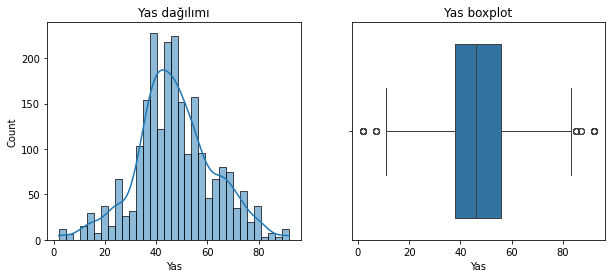

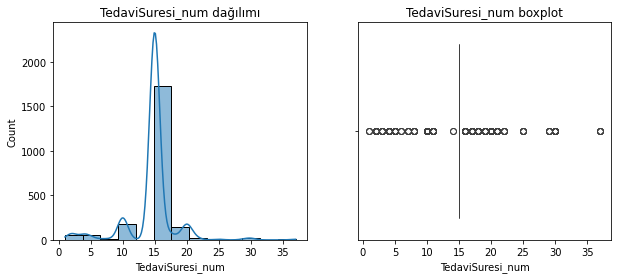

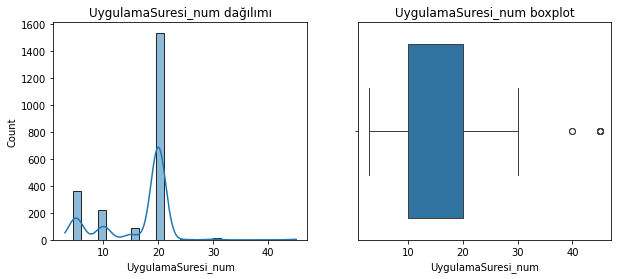

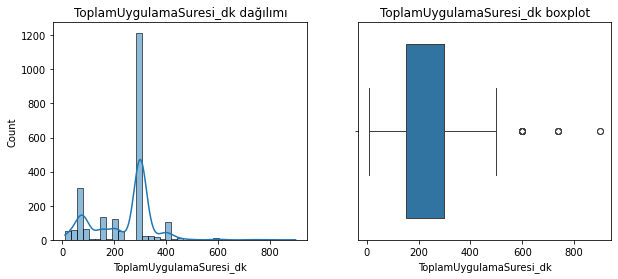

TypeError: X içinde hâlâ string sütun var -> ['UygulamaSuresi']

In [16]:
# 1) Sayısal değişkenlerin dağılımı
num_vars = ["Yas","TedaviSuresi_num","UygulamaSuresi_num","ToplamUygulamaSuresi_dk"]
for col in num_vars:
    if col in df.columns:
        fig, axes = plt.subplots(1,2,figsize=(10,4))
        sns.histplot(df[col].dropna(), kde=True, ax=axes[0])
        axes[0].set_title(f"{col} dağılımı")
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f"{col} boxplot")
        plt.show()

# 2) Kategoriklere göre tedavi süresi
cat_vars = ["Bolum_group","Cinsiyet_clean","KanGrubu_clean","TedaviAdi_clean"]
for col in cat_vars:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=col, y="TedaviSuresi_num", data=df)
        plt.title(f"Tedavi Süresi ~ {col}")
        plt.xticks(rotation=45)
        plt.show()

# 3) Multi-label count kolonları
ml_count_cols = [c for c in df.columns if c.endswith("_count")]
if ml_count_cols:
    corr = df[ml_count_cols+["TedaviSuresi_num"]].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Tedavi Süresi ile Multi-label Count Korelasyonu")
    plt.show()

# string to int dönüşümü
import re, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def parse_int_from_text(s):
    out = (s.astype(str).str.extract(r'(\d+(?:[.,]\d+)?)', expand=False)
                    .str.replace(',', '.', regex=False).astype(float))
    return out.round().astype("Int64")

def parse_minutes_from_text(s):
    out = (s.astype(str).str.extract(r'(\d+(?:[.,]\d+)?)', expand=False)
                    .str.replace(',', '.', regex=False).astype(float))
    return out

def one_hot_top(df, col, min_count=20, prefix=None):
    s = df[col].astype("string").str.strip().str.lower().fillna("unknown")
    vc = s.value_counts(dropna=False)
    keep = set(vc[vc >= min_count].index)
    mapped = s.where(s.isin(keep), other="other")
    pre = prefix or col
    ohe = pd.get_dummies(mapped, prefix=pre, dtype=np.int8)
    # tutarlılık için garanti sütunlar
    for must in (f"{pre}_unknown", f"{pre}_other"):
        if must not in ohe.columns: ohe[must] = 0
    return ohe.astype(np.int8)

# 1) Hedefi ve yardımcı sayısalları üret
if "TedaviSuresi" in df.columns:
    y = parse_int_from_text(df["TedaviSuresi"]).astype(float)
else:
    raise KeyError("Hedef kolonu 'TedaviSuresi' bulunamadı.")

if "UygulamaSuresi" in df.columns:
    df["UygulamaSuresi_num"] = parse_minutes_from_text(df["UygulamaSuresi"])
else:
    df["UygulamaSuresi"] = np.nan

# 2) Sayısal baz
num_cols = [c for c in ["Yas", "UygulamaSuresi"] if c in df.columns]
X_num = df[num_cols].copy() if num_cols else pd.DataFrame(index=df.index)

# 3) Kategorik kolonlar — tek etiket gibi OHE (çokluysa sonra ayrı ele alırız)
RARE = 20
cat_cols = [c for c in ["Cinsiyet","KanGrubu","Uyruk","Bolum","TedaviAdi"] if c in df.columns]
ohe_blocks = [one_hot_top(df, c, min_count=RARE, prefix=c) for c in cat_cols]
X_cat = pd.concat(ohe_blocks, axis=1) if ohe_blocks else pd.DataFrame(index=df.index)

# 4) Nihai X: sadece sayısallar
X = pd.concat([X_num, X_cat], axis=1).fillna(0)

# Güvenlik: object/string kaldı mı?
leftover = X.select_dtypes(include="object").columns.tolist()
if leftover:
    raise TypeError(f"X içinde hâlâ string sütun var -> {leftover[:8]}")

# 5) Hedef NaN olmayanları kullan
mask = y.notna()
X, y = X[mask], y[mask]

# 6) Train/Test ve model
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(Xtr, ytr)
pred = rf.predict(Xte)

print(f"MAE: {mean_absolute_error(yte, pred):.2f} | R²: {r2_score(yte, pred):.3f}")
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)
print("\nTop 20 importances:\n", imp)


## 2.EDA Sonrası Yorumlar:
- kategorik gruplarda bazı noktalarda nadir görülen değerler mevcut ama sayısal verilerde outlier değerler temizlenmiş bulunmakta. 
- nan değerler ile ilgili handle yöntemi geliştirilmiş ve uygulanmış
- kategorik değerler sayısallaştırılmış
- veri seti genel anlamda modele hazır halde